In [116]:
# %matplotlib inline
import numpy as np
import scipy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt

from utils import *

mpl.rcParams.update(rcParams)

In [117]:
%%bash
cd .. && make clean && make

src/Exercice6_2024_student.cpp:127:18: warning: 'size_t' suffix for literals is a C++23 extension [-Wc++23-extensions]
  127 |         if (i == 0uz) {
      |                  ^
src/Exercice6_2024_student.cpp:154:18: warning: 'size_t' suffix for literals is a C++23 extension [-Wc++23-extensions]
  154 |         if (i == 0uz) {
      |                  ^
src/Exercice6_2024_student.cpp:258:18: warning: unused variable 'Nx0' [-Wunused-variable]
  258 |     unsigned int Nx0 = floor((xR * 0.5 - xL) / (xR - xL) * Npoints); //chosen xR*0.5 since top of potential is at half x domain
      |                  ^~~
3 warnings generated.


In [118]:
config_name = 'example'
conf = load_conf(config_name)

In [119]:
# Contains tuple of:
# - params
# - data_pot
# - data_phi2[ |Φ|, Re{Φ}, Im{Φ} ]
# - data_obs[t, prob, prob, E, xmoy, x2moy, pmoy, p2moy]
dataset = run_with_params(
    config_name,
    [{}]
)

Running simulations... Done 1/1


# Plots!

In [120]:
plt.close()

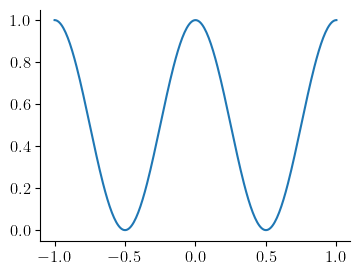

In [121]:
%matplotlib inline
# thingies here
params, data_pot, data_psi2, data_obs = dataset[-1]
plt.plot(data_pot[:,0], data_pot[:,1])

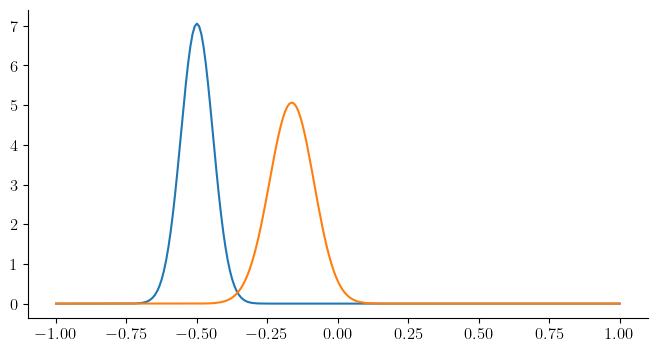

In [122]:
%matplotlib inline
plt.figure(figsize=(8, 4))
plt.plot(data_pot[:,0], data_psi2[0,::3])
# plt.plot(data_pot[:,0], data_phi2[0,1::3])
# plt.plot(data_pot[:,0], data_phi2[0,2::3])
plt.plot(data_pot[:,0], data_psi2[69,::3])

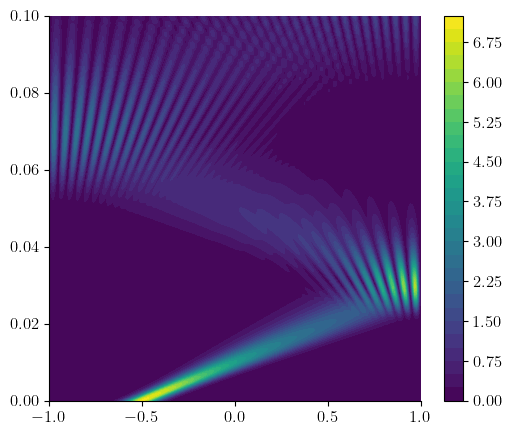

In [123]:
%matplotlib inline
X, Y = np.meshgrid(data_pot[:,0], data_obs[:,0])
plt.figure(figsize=(6,5))
plt.contourf(X, Y, data_psi2[:,::3], levels=32)
plt.colorbar()

In [115]:
%matplotlib qt
import matplotlib.animation as mpla

plt.figure(figsize=(8, 6))

line1, = plt.plot(data_pot[:,0], data_psi2[0,::3])
line2, = plt.plot(data_pot[:,0], data_psi2[0,1::3])
line3, = plt.plot(data_pot[:,0], data_psi2[0,2::3])
size = data_psi2.shape[0]

def animate(i) -> Any:
    idx = i % size
    line1.set_data(data_pot[:,0], data_psi2[idx,::3])
    line2.set_data(data_pot[:,0], data_psi2[idx,1::3])
    line3.set_data(data_pot[:,0], data_psi2[idx,2::3])

anim = mpla.FuncAnimation(plt.gcf(), animate, interval=20, cache_frame_data=True, frames=size)

plt.xlabel(r'$x$ [m]')
plt.ylabel(r'$|\Psi|^2$')
# plt.ylim(-2, 2)
plt.grid()
plt.tight_layout()